### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

- First let's get a description of the data fields:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

 - Normally I would begin by looking for duplicated rows in the data. However, because this dataset contains primarily categorical data, it's reasonable for there to be rows that contain the exact same values. So I'll just check the total number of duplicates to make sure it seems reasonable:

In [5]:
# Show some statistics about duplicated rows
print("Duplicate rows:", data.duplicated().sum())
print("Total rows:", data.shape[0])

Duplicate rows: 74
Total rows: 12684


- There are only 74 duplicated rows out of a total of 12,684, so I'll assume that they are valid entries that just happen to have all the same values, and are therefore NOT to be removed.

- Next, let's count the number of missing values in each column:

In [6]:
print("Missing values:")
print(data.isnull().sum())

Missing values:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

- The field "car" is missing almost all of its values, so I'll drop this field from the dataframe:

In [7]:
data = data.drop('car', axis=1)

- The five remaining fields with missing values are likely to be important for the analysis, because they indicate driver habits, and they represent only a small fraction of the total number of samples, so I will drop all the rows that are missing any values:

In [8]:
data = data[data.isnull().sum(axis=1) == 0]

- Now let's confirm that there are no more missing values in the DataFrame, and get the size:

In [9]:
print("Missing values:")
print(data.isnull().sum())
print("")
print("Total number of rows:", data.shape[0])

Missing values:
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

Total number of rows: 12079


4. What proportion of the total observations chose to accept the coupon?



In [10]:
print(f"Overall acceptance rate = {100 * (data['Y'].sum() / data.shape[0]):.2f}%")

Overall acceptance rate = 56.93%


5. Use a bar plot to visualize the `coupon` column.

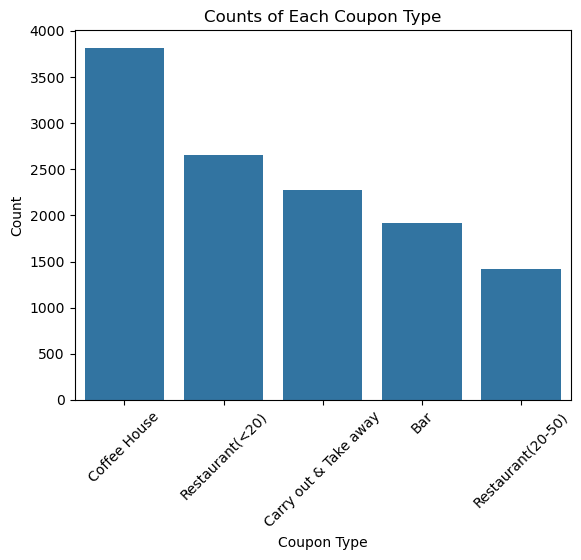

In [11]:
sns.barplot(data['coupon'].value_counts())
plt.title("Counts of Each Coupon Type")
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

6. Use a histogram to visualize the temperature column.

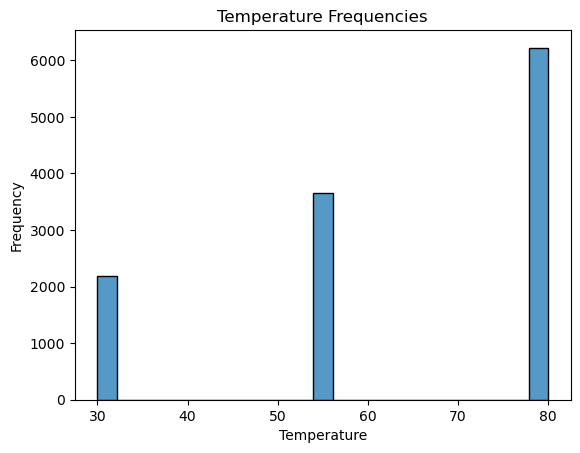

In [12]:
sns.histplot(data, x = 'temperature')
plt.title("Temperature Frequencies")
plt.xlabel("Temperature")
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:
# Keep only rows where the coupon type is 'Bar'
dataBarOnly = data[data['coupon'] == 'Bar']

# Describe the resulting data
print("Total number of rows for Bar coupons only:", dataBarOnly.shape[0])

Total number of rows for Bar coupons only: 1913


2. What proportion of bar coupons were accepted?


In [14]:
print(f"Percentage of bar coupons accepted = {100 * (dataBarOnly['Y'].sum() / dataBarOnly.shape[0]):.2f}%")

Percentage of bar coupons accepted = 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


- First, get the counts for each of the 'Bar' field values:

In [15]:
print("Counts of each 'Bar' field value:")
print(dataBarOnly['Bar'].value_counts())

Counts of each 'Bar' field value:
Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64


- Now create separate DataFrames for each case, and calculate the acceptance rates for each:

In [16]:
# Create separate DataFrames for the two conditions
dataBarOnlyFewer = dataBarOnly[dataBarOnly['Bar'].isin(['never', 'less1', '1~3'])]
dataBarOnlyMore  = dataBarOnly[dataBarOnly['Bar'].isin(['4~8', 'gt8'])]

# Describe the separate samples to validate the total number (should add to 1913)
print("Samples for 3 or fewer: ", dataBarOnlyFewer.shape[0])
print("Samples for more than 3:", dataBarOnlyMore.shape[0])

# Calculate the acceptance rates for each
print(f"Acceptance rate for 3 or fewer:  {100 * (dataBarOnlyFewer['Y'].sum() / dataBarOnlyFewer.shape[0]):.2f}%")
print(f"Acceptance rate for more than 3: {100 * (dataBarOnlyMore['Y'].sum()  / dataBarOnlyMore.shape[0]):.2f}%")

Samples for 3 or fewer:  1720
Samples for more than 3: 193
Acceptance rate for 3 or fewer:  37.27%
Acceptance rate for more than 3: 76.17%


- Drivers who went to a bar more than 3 times a month were about twice as likely to accept a bar coupon than those who went less.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


- I'm going to assume that the question meant to say "once a month or more" instead of "more than once a month", because the latter cannot be answered from the given classifications.

- First let's look at the category counts for the 'age' field so we can see the possible field values:

In [17]:
print(dataBarOnly['age'].value_counts())

age
21         397
26         368
31         324
50plus     273
36         196
41         171
46         103
below21     81
Name: count, dtype: int64


- Now create separate DataFrames for drivers who go to a bar once a month or more and are over 25, and all others, and then calculate the acceptance rates for each:

In [18]:
# Create separate DataFrames for the two conditions
dataBarOnlyOnceOrMoreOver25 = dataBarOnly[  dataBarOnly['Bar'].isin(['1~3', '4~8', 'gt8'])  & (~dataBarOnly['age'].isin(['below21', '21']))]
dataBarOnlyAllOthers        = dataBarOnly[(~dataBarOnly['Bar'].isin(['1~3', '4~8', 'gt8'])) |   dataBarOnly['age'].isin(['below21', '21']) ]

# Describe the separate samples to validate the total number (should add to 1913)
print("Samples for once or more and over 25:", dataBarOnlyOnceOrMoreOver25.shape[0])
print("Samples for all others:              ", dataBarOnlyAllOthers.shape[0])

# Calculate the acceptance rates for each
print(f"Acceptance rate for once or more and over 25: {100 * (dataBarOnlyOnceOrMoreOver25['Y'].sum() / dataBarOnlyOnceOrMoreOver25.shape[0]):.2f}%")
print(f"Acceptance rate for all others:               {100 * (dataBarOnlyAllOthers['Y'].sum()        / dataBarOnlyAllOthers.shape[0]):.2f}%")

Samples for once or more and over 25: 403
Samples for all others:               1510
Acceptance rate for once or more and over 25: 68.98%
Acceptance rate for all others:               33.77%


- Drivers who went to a bar once a month or more and were over 25 were about twice as likely to accept a bar coupon than all others.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


- It is not clear what I am supposed to comparing "between". There are three conditions separated with "and" in the question; am I comparing "between" these three conditions separately, or comparing drivers who meet all three conditions to ones who don't? I'll answer both questions, just to be safe.

- First let's look at the category counts for the 'passanger' and 'occupation' fields so we can see the possible field values:

In [19]:
print(dataBarOnly['passanger'].value_counts())
print("")
print(dataBarOnly['occupation'].value_counts())

passanger
Alone        1141
Friend(s)     318
Partner       260
Kid(s)        194
Name: count, dtype: int64

occupation
Unemployed                                   292
Student                                      237
Computer & Mathematical                      225
Sales & Related                              175
Education&Training&Library                   125
Management                                   108
Office & Administrative Support              101
Arts Design Entertainment Sports & Media      88
Business & Financial                          82
Retired                                       71
Healthcare Support                            44
Food Preparation & Serving Related            43
Community & Social Services                   40
Healthcare Practitioners & Technical          36
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Protective Service                            2

- Now create separate DataFrames for the three separate conditions and then calculate the acceptance rates for each:

In [20]:
# Create separate DataFrames for the three conditions
dataBarOnlyOnceOrMore = dataBarOnly[ dataBarOnly['Bar']       .isin(['1~3', '4~8', 'gt8'])]
dataBarOnlyPassNotKid = dataBarOnly[ dataBarOnly['passanger'] .isin(['Friend(s)', 'Partner'])]
dataBarOnlyOccupNotF3 = dataBarOnly[~dataBarOnly['occupation'].isin(['Farming Fishing & Forestry'])]

# Describe the separate samples (and validate the results manually)
print("Samples for once or more:         ", dataBarOnlyOnceOrMore.shape[0])
print("Samples for passenger not a kid:  ", dataBarOnlyPassNotKid.shape[0])
print("Samples for occupation condition: ", dataBarOnlyOccupNotF3.shape[0])

# Calculate the acceptance rates for each
print(f"Acceptance rate for once or more:         {100 * (dataBarOnlyOnceOrMore['Y'].sum() / dataBarOnlyOnceOrMore.shape[0]):.2f}%")
print(f"Acceptance rate for passenger not a kid:  {100 * (dataBarOnlyPassNotKid['Y'].sum() / dataBarOnlyPassNotKid.shape[0]):.2f}%")
print(f"Acceptance rate for occupation condition: {100 * (dataBarOnlyOccupNotF3['Y'].sum() / dataBarOnlyOccupNotF3.shape[0]):.2f}%")

Samples for once or more:          572
Samples for passenger not a kid:   578
Samples for occupation condition:  1904
Acceptance rate for once or more:         68.53%
Acceptance rate for passenger not a kid:  48.62%
Acceptance rate for occupation condition: 41.18%


- The acceptance rate for drivers who go to a bar once or more per month is the highest, followed by drivers who have a passenger who is not a kid. Drivers who are not in farming, fishing, or forestry have an acceptance rate that is almost the same as the overall acceptance rate, because there were only 9 samples excluded for this condition. That makes me think that this was the wrong interpretation of the question, so now I'll answer it the other way.

- Now create separate DataFrames for drivers who meet all three conditions and ones who don't, and then calculate the acceptance rates for each:

In [21]:
# Create separate DataFrames for samples that meet all three conditions and those that don't meet all three conditions
dataBarOnlyMeetsConditions = dataBarOnly[  dataBarOnly['Bar'].isin(['1~3', '4~8', 'gt8'])          &
                                           dataBarOnly['passanger'].isin(['Friend(s)', 'Partner']) &
                                         (~dataBarOnly['occupation'].isin(['Farming Fishing & Forestry']))]
dataBarOnlyDoesntMeetConds = dataBarOnly[(~dataBarOnly['Bar'].isin(['1~3', '4~8', 'gt8']))          |
                                         (~dataBarOnly['passanger'].isin(['Friend(s)', 'Partner'])) |
                                           dataBarOnly['occupation'].isin(['Farming Fishing & Forestry'])]

# Describe the separate samples to validate the total number (should add to 1913)
print("Samples that meet all three conditions:", dataBarOnlyMeetsConditions.shape[0])
print("Samples that don't meet all conditions:", dataBarOnlyDoesntMeetConds.shape[0])

# Calculate the acceptance rates for each
print(f"Acceptance rate for meeting all three conditions: {100 * (dataBarOnlyMeetsConditions['Y'].sum() / dataBarOnlyMeetsConditions.shape[0]):.2f}%")
print(f"Acceptance rate for not meeting three conditions: {100 * (dataBarOnlyDoesntMeetConds['Y'].sum() / dataBarOnlyDoesntMeetConds.shape[0]):.2f}%")

Samples that meet all three conditions: 189
Samples that don't meet all conditions: 1724
Acceptance rate for meeting all three conditions: 71.43%
Acceptance rate for not meeting three conditions: 37.88%


- The acceptance rate for drivers meeting all three conditions is about twice as high as those not meeting all three conditions.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



- First let's look at the category counts for the 'maritalStatus', 'RestaurantLessThan20', and 'income' fields so we can see the possible field values:

In [22]:
print(dataBarOnly['maritalStatus'].value_counts())
print("")
print(dataBarOnly['RestaurantLessThan20'].value_counts())
print("")
print(dataBarOnly['income'].value_counts())

maritalStatus
Married partner      833
Single               638
Unmarried partner    352
Divorced              73
Widowed               17
Name: count, dtype: int64

RestaurantLessThan20
1~3      839
4~8      548
less1    312
gt8      186
never     28
Name: count, dtype: int64

income
$25000 - $37499     300
$100000 or More     282
$12500 - $24999     271
$50000 - $62499     249
$37500 - $49999     247
Less than $12500    159
$75000 - $87499     143
$87500 - $99999     133
$62500 - $74999     129
Name: count, dtype: int64


- Now create separate DataFrames for each of the three conditions, and calculate the acceptance rates for each:

In [23]:
# Create separate DataFrames for each of the three conditions
dataBarOnlyCondition1 = dataBarOnly[dataBarOnly['Bar'].isin(['1~3', '4~8', 'gt8'])           &
                                    dataBarOnly['passanger'].isin(['Friend(s)', 'Partner'])  &
                                  (~dataBarOnly['maritalStatus'].isin(['Widowed']))]
dataBarOnlyCondition2 = dataBarOnly[dataBarOnly['Bar'].isin(['1~3', '4~8', 'gt8']) &
                                    dataBarOnly['age'].isin(['below21', '21', '26'])]
dataBarOnlyCondition3 = dataBarOnly[dataBarOnly['RestaurantLessThan20'].isin(['4~8', 'gt8']) &
                                    dataBarOnly['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])]

# Describe the separate sample sizes
print("Samples that meet condition 1:", dataBarOnlyCondition1.shape[0])
print("Samples that meet condition 2:", dataBarOnlyCondition2.shape[0])
print("Samples that meet condition 3:", dataBarOnlyCondition3.shape[0])

# Calculate the acceptance rates for each
print(f"Acceptance rate for condition 1: {100 * (dataBarOnlyCondition1['Y'].sum() / dataBarOnlyCondition1.shape[0]):.2f}%")
print(f"Acceptance rate for condition 2: {100 * (dataBarOnlyCondition2['Y'].sum() / dataBarOnlyCondition2.shape[0]):.2f}%")
print(f"Acceptance rate for condition 3: {100 * (dataBarOnlyCondition3['Y'].sum() / dataBarOnlyCondition3.shape[0]):.2f}%")

Samples that meet condition 1: 189
Samples that meet condition 2: 328
Samples that meet condition 3: 333
Acceptance rate for condition 1: 71.43%
Acceptance rate for condition 2: 71.95%
Acceptance rate for condition 3: 45.65%


- It looks like the acceptance rates for the drivers in the first two conditions, which both include going to a bar once a month or more, are much higher (at around 72%) than the acceptance rate for the third condition (at 46%), and also much higher than the overall acceptance rate of 41%. The acceptance rate for the third condition is pretty close to the overall acceptance rate.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

- We did a variety of analyses looking at various driver attributes, and the only one that seems to consistently and significantly affect the acceptance rate is how often the driver goes to bars. Therefore I hypothesize that drivers who accepted the bar coupons were more likely to be the ones who reported that they go to bars at least once a month, and those who reported going more than three times a month were even more likely to accept the coupon. Having a passenger who is not a kid seemed to increase the likelihood of acceptance by a small amount, but age did not seem to significantly affect the acceptance rate. However the analyses done here often combined different attributes, so a better analysis would isolate each attribute separately when looking at the acceptance rates.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### 1. Data Selection - Coffee House Coupon
- The coupon type "Coffee House" has the most samples, so I will select this one for my independent investigation.
- First, I'll create a new `DataFrame` that contains just the Coffee House coupons.

In [24]:
# Keep only rows where the coupon type is 'Coffee House'
dataCoffee = data[data['coupon'] == 'Coffee House']

# Describe the resulting data
print("Total number of rows for Coffee House coupons only:", dataCoffee.shape[0])

Total number of rows for Coffee House coupons only: 3816


#### 2. Baseline Acceptance Rate
- I'll start by calculating the overall acceptance rate, for comparisons in the analysis:

In [25]:
print(f"Percentage of Coffee House coupons accepted = {100 * (dataCoffee['Y'].sum() / dataCoffee.shape[0]):.2f}%")

Percentage of Coffee House coupons accepted = 49.63%


#### 3. Analyses of Separate Individual Attributes
- We want to know which driver attributes affect acceptance rate. I'll start by analyzing the effects of these attributes separately.
- There are too many attributes to analyze them all for this assignment, so I will chose the ones that I believe are mostly likely to be significant.

##### 3.1 Coffee House Visits (Field: 'CoffeeHouse')
- I'll begin with the most obvious choice, the number of times the driver visits a coffee house each month.
- First, check that there is a sufficient number of samples in each frequency category:

In [26]:
print("Counts of each 'CoffeeHouse' field value:")
print(dataCoffee['CoffeeHouse'].value_counts())

Counts of each 'CoffeeHouse' field value:
CoffeeHouse
less1    1052
1~3      1019
never     896
4~8       507
gt8       342
Name: count, dtype: int64


- These counts seem sufficient.
- Let's plot the counts in each frequency category:

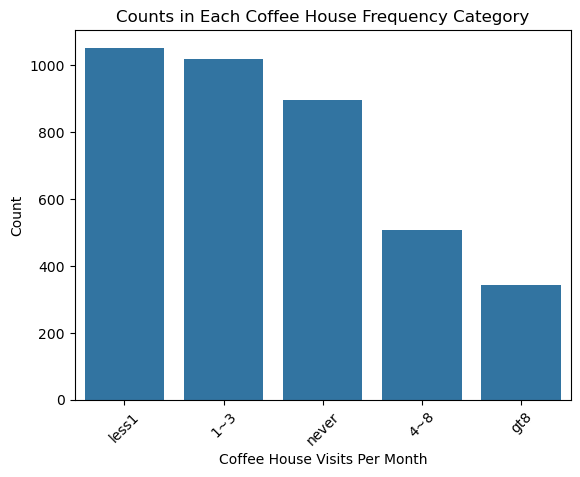

In [27]:
sns.barplot(dataCoffee['CoffeeHouse'].value_counts())
plt.title("Counts in Each Coffee House Frequency Category")
plt.xlabel("Coffee House Visits Per Month")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

- Now let's calculate and plot the coupon acceptance rate for each category:

Acceptance rate for never: 17.52%
Acceptance rate for less1: 48.10%
Acceptance rate for 1~3: 64.77%
Acceptance rate for 4~8: 68.24%
Acceptance rate for gt8: 65.79%


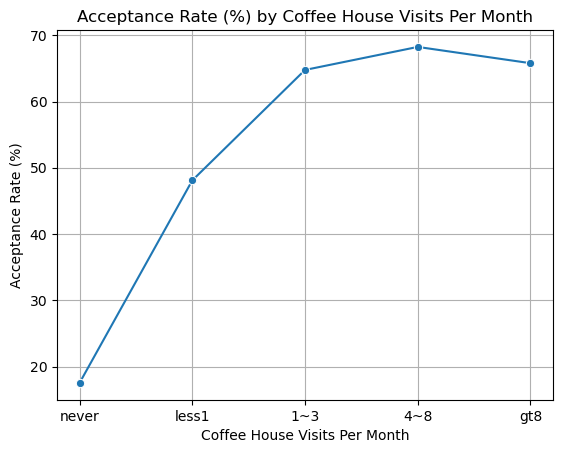

In [28]:
# Calculate the acceptance rate (in %) for each CoffeeHouse value (can be done with groupby because we're looking at each value individually)
accRateCoffeeHouse = 100 * dataCoffee.groupby('CoffeeHouse')['Y'].mean()

# Sort the acceptance rates by visits per month in increasing order
accRateCoffeeHouse.index = pd.Categorical(accRateCoffeeHouse.index, categories=['never', 'less1', '1~3', '4~8', 'gt8'])
accRateCoffeeHouse = accRateCoffeeHouse.sort_index()

# Display the acceptance rates by visits per month
for index, value in accRateCoffeeHouse.items():
    print(f"Acceptance rate for {index}: {value:.2f}%")

# Plot the acceptance rates
sns.lineplot(accRateCoffeeHouse, marker='o')
plt.title("Acceptance Rate (%) by Coffee House Visits Per Month")
plt.xlabel("Coffee House Visits Per Month")
plt.ylabel("Acceptance Rate (%)")
plt.grid()
plt.show()

- There is a clear trend, where the more often a driver typically visits a coffee house, the more likely they are to accept the coupon.
- The curve flattens out at the top, so the likelihood of acceptance doesn't increase beyond the 1-3 category.

##### 3.2 Passenger Status (Field: 'passanger')
- Next let's check whether the passenger attribute affects the acceptance rate.
- Again, let's check that there is a sufficient number of samples in each category:

In [29]:
print("Counts of each 'passanger' field value:")
print(dataCoffee['passanger'].value_counts())

Counts of each 'passanger' field value:
passanger
Alone        2157
Friend(s)    1175
Partner       291
Kid(s)        193
Name: count, dtype: int64


- These counts seem sufficient, so let's calculate and plot the coupon acceptance rate for each category:

Acceptance rate for Alone: 43.39%
Acceptance rate for Friend(s): 59.74%
Acceptance rate for Kid(s): 47.15%
Acceptance rate for Partner: 56.70%


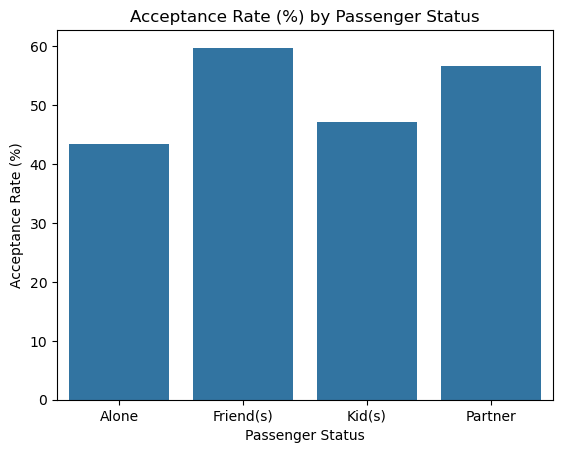

In [30]:
# Calculate the acceptance rate (in %) for each passenger status
accRatePassenger = 100 * dataCoffee.groupby('passanger')['Y'].mean()

# Display the acceptance rates by passenger status
for index, value in accRatePassenger.items():
    print(f"Acceptance rate for {index}: {value:.2f}%")

# Plot the acceptance rates
sns.barplot(accRatePassenger)
plt.title("Acceptance Rate (%) by Passenger Status")
plt.xlabel("Passenger Status")
plt.ylabel("Acceptance Rate (%)")
plt.show()

- It looks like drivers are a little more likely to accept the coupon if they are with a friend or partner, as opposed to being alone or with kids.

##### 3.3 Age (Field: 'age')
- Now we'll check whether the driver's age affects the acceptance rate.
- Start by checking the number of samples in each category:

In [31]:
print("Counts of each 'age' field value:")
print(dataCoffee['age'].value_counts())

Counts of each 'age' field value:
age
21         844
26         797
31         587
50plus     529
36         382
41         317
46         217
below21    143
Name: count, dtype: int64


- These counts seem sufficient, so let's calculate and plot the coupon acceptance rate for each category:

Acceptance rate for below21: 67.83%
Acceptance rate for 21: 51.78%
Acceptance rate for 26: 51.32%
Acceptance rate for 31: 48.38%
Acceptance rate for 36: 46.86%
Acceptance rate for 41: 49.21%
Acceptance rate for 46: 50.69%
Acceptance rate for 50plus: 41.97%


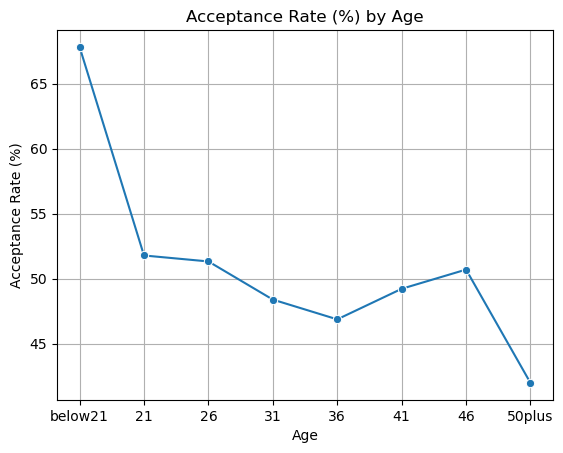

In [32]:
# Calculate the acceptance rate (in %) for each age group
accRateAge = 100 * dataCoffee.groupby('age')['Y'].mean()

# Sort the acceptance rates by age in increasing order
accRateAge.index = pd.Categorical(accRateAge.index, categories=['below21', '21', '26', '31', '36', '41', '46', '50plus'])
accRateAge = accRateAge.sort_index()

# Display the acceptance rates by age
for index, value in accRateAge.items():
    print(f"Acceptance rate for {index}: {value:.2f}%")

# Plot the acceptance rates
sns.lineplot(accRateAge, marker='o')
plt.title("Acceptance Rate (%) by Age")
plt.xlabel("Age")
plt.ylabel("Acceptance Rate (%)")
plt.grid()
plt.show()

- Drivers below the age of 21 are most likely to accept the coupon, and drivers over the age of 50 are least likely to accept. There may be a weak U-shaped association in the ages between that, but without doing a full statistical analysis it's hard to tell whether that is a real effect.

##### 3.4 Income (Field: 'income')
- Next let's check the effect of the driver's income on the acceptance rate.
- Check the number of samples in each category:

In [33]:
print("Counts of each 'income' field value:")
print(dataCoffee['income'].value_counts())

Counts of each 'income' field value:
income
$25000 - $37499     617
$12500 - $24999     565
$37500 - $49999     559
$100000 or More     525
$50000 - $62499     512
Less than $12500    298
$62500 - $74999     271
$87500 - $99999     241
$75000 - $87499     228
Name: count, dtype: int64


- These counts seem sufficient, so let's calculate and plot the coupon acceptance rate for each category:

Acceptance rate for Less than $12500: 54.03%
Acceptance rate for $12500 - $24999: 55.22%
Acceptance rate for $25000 - $37499: 46.52%
Acceptance rate for $37500 - $49999: 54.74%
Acceptance rate for $50000 - $62499: 49.80%
Acceptance rate for $62500 - $74999: 43.54%
Acceptance rate for $75000 - $87499: 29.82%
Acceptance rate for $87500 - $99999: 53.94%
Acceptance rate for $100000 or More: 48.95%


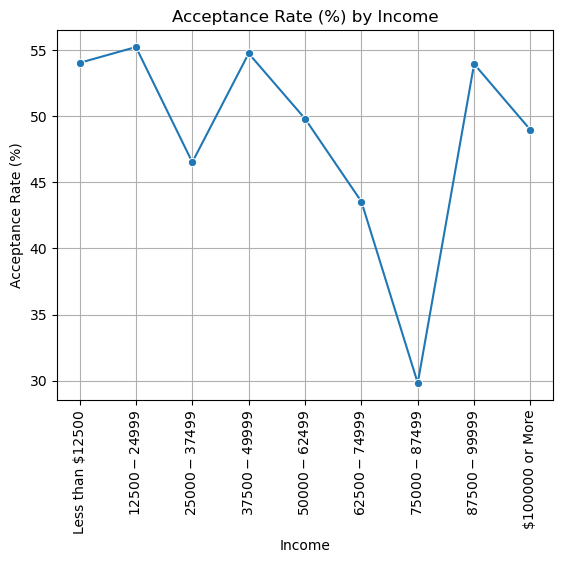

In [34]:
# Calculate the acceptance rate (in %) for each income group
accRateIncome = 100 * dataCoffee.groupby('income')['Y'].mean()

# Sort the acceptance rates by age in increasing order
accRateIncome.index = pd.Categorical(accRateIncome.index, categories=['Less than $12500',
                                                                      '$12500 - $24999',
                                                                      '$25000 - $37499',
                                                                      '$37500 - $49999',
                                                                      '$50000 - $62499',
                                                                      '$62500 - $74999',
                                                                      '$75000 - $87499',
                                                                      '$87500 - $99999',
                                                                      '$100000 or More'])
accRateIncome = accRateIncome.sort_index()

# Display the acceptance rates by age
for index, value in accRateIncome.items():
    print(f"Acceptance rate for {index}: {value:.2f}%")

# Plot the acceptance rates
sns.lineplot(accRateIncome, marker='o')
plt.title("Acceptance Rate (%) by Income")
plt.xlabel("Income")
plt.ylabel("Acceptance Rate (%)")
plt.xticks(rotation = 90)
plt.grid()
plt.show()

- Somewhat surprisingly, income doesn't seem to affect the coupon acceptance rate in a systematic way. There is some variation and a dip in the middle for the 75,000 to 87,499 category, but this category had the fewest observations, so I'm going to assume that this is random statistical variation.

##### 3.5 Marital Status (Field: 'maritalStatus')
- Finally, as the last of the separate analyses, let's check the effect of the driver's marital status.
- Check the number of samples in each category:

In [35]:
print("Counts of each 'maritalStatus' field value:")
print(dataCoffee['maritalStatus'].value_counts())

Counts of each 'maritalStatus' field value:
maritalStatus
Single               1497
Married partner      1466
Unmarried partner     676
Divorced              143
Widowed                34
Name: count, dtype: int64


- The number of widowed drivers is low, so conclusions regarding those acceptance rates will be regarded with suspicion. The remaining counts seem sufficient, so now let's calculate and plot the coupon acceptance rate for each category:

Acceptance rate for Divorced: 51.75%
Acceptance rate for Married partner: 49.11%
Acceptance rate for Single: 51.44%
Acceptance rate for Unmarried partner: 47.04%
Acceptance rate for Widowed: 35.29%


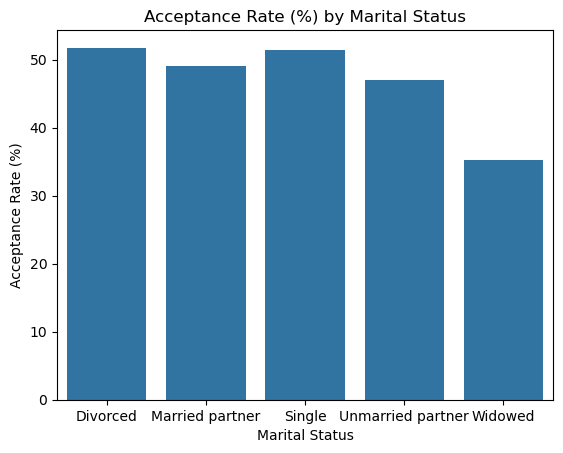

In [36]:
# Calculate the acceptance rate (in %) for each marital status
accRateMarital = 100 * dataCoffee.groupby('maritalStatus')['Y'].mean()

# Display the acceptance rates by marital status
for index, value in accRateMarital.items():
    print(f"Acceptance rate for {index}: {value:.2f}%")

# Plot the acceptance rates
sns.barplot(accRateMarital)
plt.title("Acceptance Rate (%) by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Acceptance Rate (%)")
plt.show()

- It doesn't look like marital status plays much of a role in determining acceptance rate (as noted, the results for Widowed are not conclusive due to the low sample size).

#### 4. Analyses of Attribute Interactions
- As the final step, let's look for interactions between some of the driver attributes. For example, we've seen that younger drivers are more likely to accept the coupon, as are drivers who go to coffee houses more often. Is this because younger drivers tend to go to coffee houses more often, or are these effects independent?

##### 4.1 Age & Coffee House Visits (Fields: 'age' & 'CoffeeHouse')
- Let's begin by separating the data into younger drivers (categories "below21" and "21") and older drivers (categories "26" and above), and then check the coffee house visit frequencies for each group separately:

In [37]:
# Separate the data into two distinct DataFrames based on age
dataCoffeeYounger = dataCoffee[dataCoffee['age'].isin(['below21', '21'])]
dataCoffeeOlder   = dataCoffee[~dataCoffee['age'].isin(['below21', '21'])]

# Get the counts of coffee house visit frequencies for both groups
countsCoffeeYounger = dataCoffeeYounger['CoffeeHouse'].value_counts()
countsCoffeeOlder   = dataCoffeeOlder['CoffeeHouse'].value_counts()

# Sort the counts by age
countsCoffeeYounger.index = pd.Categorical(countsCoffeeYounger.index, categories=['never', 'less1', '1~3', '4~8', 'gt8'])
countsCoffeeOlder.index   = pd.Categorical(countsCoffeeOlder.index,   categories=['never', 'less1', '1~3', '4~8', 'gt8'])
countsCoffeeYounger = countsCoffeeYounger.sort_index()
countsCoffeeOlder   = countsCoffeeOlder.sort_index()

# Show the counts of coffee house visit frequencies for both groups (sorted by age within each group)
print("Coffee House Visits by Younger Group:")
print(countsCoffeeYounger)
print("")
print("Coffee House Visits by Older Group:")
print(countsCoffeeOlder)

Coffee House Visits by Younger Group:
never    216
less1    243
1~3      285
4~8      163
gt8       80
Name: count, dtype: int64

Coffee House Visits by Older Group:
never    680
less1    809
1~3      734
4~8      344
gt8      262
Name: count, dtype: int64


- These counts appear roughly proportional for the two age groups (it's not the case that younger drivers tend to go to coffee shops more often), so I'm already suspecting that the effects are independent.
- Now let's calculate the acceptance rates for each coffee house visit frequency, separately for each age group, and plot them:

Acceptance Rates by Younger Group:
Acceptance rate for never: 25.46%
Acceptance rate for less1: 43.21%
Acceptance rate for 1~3: 68.07%
Acceptance rate for 4~8: 71.78%
Acceptance rate for gt8: 78.75%

Acceptance Rates by Older Group:
Acceptance rate for never: 15.00%
Acceptance rate for less1: 49.57%
Acceptance rate for 1~3: 63.49%
Acceptance rate for 4~8: 66.57%
Acceptance rate for gt8: 61.83%


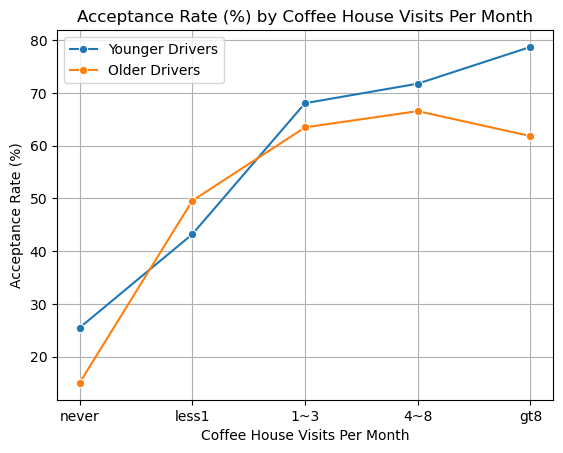

In [38]:
# Calculate the acceptance rate (in %) for each CoffeeHouse value, in each age group separately
accRateCoffeeHouseYounger = 100 * dataCoffeeYounger.groupby('CoffeeHouse')['Y'].mean()
accRateCoffeeHouseOlder   = 100 * dataCoffeeOlder.groupby('CoffeeHouse')['Y'].mean()

# Sort the acceptance rates by visits per month in increasing order
accRateCoffeeHouseYounger.index = pd.Categorical(accRateCoffeeHouseYounger.index, categories=['never', 'less1', '1~3', '4~8', 'gt8'])
accRateCoffeeHouseOlder.index   = pd.Categorical(accRateCoffeeHouseOlder.index,   categories=['never', 'less1', '1~3', '4~8', 'gt8'])
accRateCoffeeHouseYounger = accRateCoffeeHouseYounger.sort_index()
accRateCoffeeHouseOlder   = accRateCoffeeHouseOlder.sort_index()

# Display the acceptance rates by visits per month in each age group
print("Acceptance Rates by Younger Group:")
for index, value in accRateCoffeeHouseYounger.items():
    print(f"Acceptance rate for {index}: {value:.2f}%")
print("")
print("Acceptance Rates by Older Group:")
for index, value in accRateCoffeeHouseOlder.items():
    print(f"Acceptance rate for {index}: {value:.2f}%")

# Plot the acceptance rates for each age group
sns.lineplot(accRateCoffeeHouseYounger, label = 'Younger Drivers', marker='o')
sns.lineplot(accRateCoffeeHouseOlder,   label = 'Older Drivers',   marker='o')
plt.title("Acceptance Rate (%) by Coffee House Visits Per Month")
plt.xlabel("Coffee House Visits Per Month")
plt.ylabel("Acceptance Rate (%)")
plt.legend()
plt.grid()
plt.show()

- The shapes of the two curves are roughly equivalent, so I conclude that the effects of the two attributes are independent.

##### 4.2 Age & Passenger Status (Fields: 'age' & 'passanger')
- The final interaction I'll investigate is Age and Passenger Status. We've seen that younger drivers are more likely to accept the coupon, as are drivers who have a passenger who is not a child. Is that because younger drivers are more likely to have a passenger who is not a child?
- Let's check the passenger status counts for each age group separately:

In [39]:
# Show the counts of coffee house visit frequencies for both groups
print("Passenger Status Counts for Younger Group:")
print(dataCoffeeYounger['passanger'].value_counts())
print("")
print("Passenger Status Counts for Older Group:")
print(dataCoffeeOlder['passanger'].value_counts())

Passenger Status Counts for Younger Group:
passanger
Alone        573
Friend(s)    315
Partner       83
Kid(s)        16
Name: count, dtype: int64

Passenger Status Counts for Older Group:
passanger
Alone        1584
Friend(s)     860
Partner       208
Kid(s)        177
Name: count, dtype: int64


- The ratios of Friend or Partner (higher acceptance rates) to Alone or Kid (lower acceptance rates) appear roughly similar between the two age groups.
- Now let's calculate the acceptance rates for each passenger status, separately for each age group, and plot them:

Acceptance Rates by Younger Group:
Acceptance rate for Alone: 47.82%
Acceptance rate for Friend(s): 64.13%
Acceptance rate for Kid(s): 81.25%
Acceptance rate for Partner: 54.22%

Acceptance Rates by Older Group:
Acceptance rate for Alone: 41.79%
Acceptance rate for Friend(s): 58.14%
Acceptance rate for Kid(s): 44.07%
Acceptance rate for Partner: 57.69%


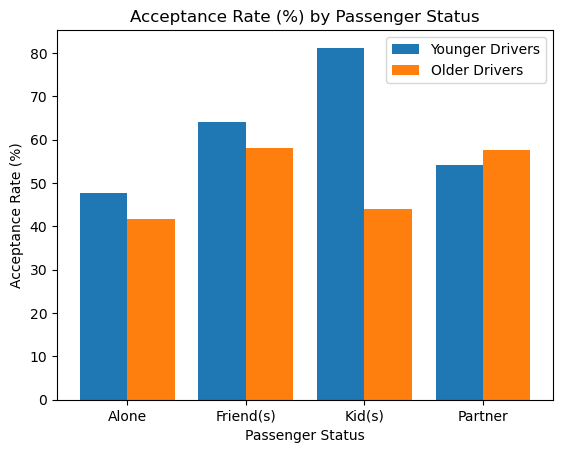

In [40]:
# Calculate the acceptance rate (in %) for each passenger status, in each age group separately
accRatePassengerYounger = 100 * dataCoffeeYounger.groupby('passanger')['Y'].mean()
accRatePassengerOlder   = 100 * dataCoffeeOlder.groupby('passanger')['Y'].mean()

# Display the acceptance rates by passenger status in each age group
print("Acceptance Rates by Younger Group:")
for index, value in accRatePassengerYounger.items():
    print(f"Acceptance rate for {index}: {value:.2f}%")
print("")
print("Acceptance Rates by Older Group:")
for index, value in accRatePassengerOlder.items():
    print(f"Acceptance rate for {index}: {value:.2f}%")

# Plot the acceptance rates for each age group
plt.bar(accRatePassengerYounger.index, accRatePassengerYounger.values, label = 'Younger Drivers', width = -0.4, align = 'edge')
plt.bar(accRatePassengerOlder.index,   accRatePassengerOlder.values,   label = 'Older Drivers',   width =  0.4, align = 'edge')
plt.title("Acceptance Rate (%) by Passenger Status")
plt.xlabel("Passenger Status")
plt.ylabel("Acceptance Rate (%)")
plt.legend()
plt.show()

- First, we see that overall, younger drivers are more likely to accept the coupon, as we saw before. But we also see an interaction where the younger drivers are about twice as likely as older drivers to accept the coffee house coupon when they have a passenger who is a kid, and whereas the overall acceptance rate for drivers with a kid passenger are lower than the average, for the young drivers the acceptance rate is actually much higher than the average. This kind of interaction between the independent variables shows why a simple linear regression model is not always the best choice for a complicated problem with many independent variables.

#### 5. Final Investigation
- Based on my analysis of the Bar coupons and the Coffee House coupons, my conclusion so far is that by far the most important driver attribute that predicts coupon acceptance rate for each coupon type is the frequency of visits to the type of establishment that the coupon is for. So to complete the analysis, I'm going to focus on just that attribute, for each of the five coupon types, and create a plot for the final report to test that conclusion. (P.S. Using rectangular select for cut and paste while editing is awesome!)

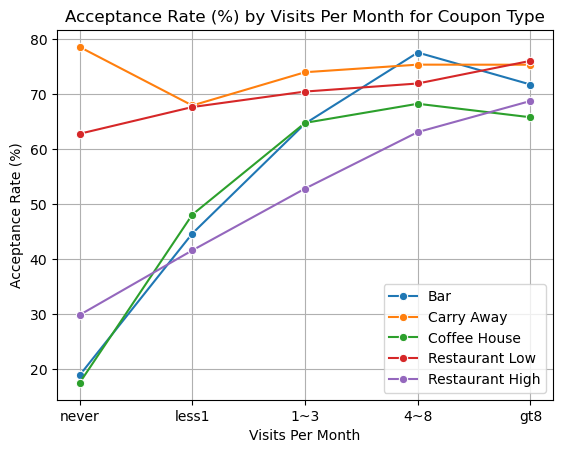

In [43]:
# Create separate DataFrames for each coupon type
dataBar    = data[data['coupon'] == 'Bar']
dataCarry  = data[data['coupon'] == 'Carry out & Take away']
dataCoffee = data[data['coupon'] == 'Coffee House']
dataRestLo = data[data['coupon'] == 'Restaurant(<20)']
dataRestHi = data[data['coupon'] == 'Restaurant(20-50)']

# Validate the data (commented out after I validated)
# print(dataBar   ['Bar'].value_counts())
# print(dataCarry ['CarryAway'].value_counts())
# print(dataCoffee['CoffeeHouse'].value_counts())
# print(dataRestLo['RestaurantLessThan20'].value_counts())
# print(dataRestHi['Restaurant20To50'].value_counts())

# Calculate the acceptance rate (in %) for each value, for each coupon type
accRateBar    = 100 * dataBar   .groupby('Bar')['Y'].mean()
accRateCarry  = 100 * dataCarry .groupby('CarryAway')['Y'].mean()
accRateCoffee = 100 * dataCoffee.groupby('CoffeeHouse')['Y'].mean()
accRateRestLo = 100 * dataRestLo.groupby('RestaurantLessThan20')['Y'].mean()
accRateRestHi = 100 * dataRestHi.groupby('Restaurant20To50')['Y'].mean()

# Sort the acceptance rates by visits per month in increasing order
accRateBar   .index = pd.Categorical(accRateBar   .index, categories=['never', 'less1', '1~3', '4~8', 'gt8'])
accRateCarry .index = pd.Categorical(accRateCarry .index, categories=['never', 'less1', '1~3', '4~8', 'gt8'])
accRateCoffee.index = pd.Categorical(accRateCoffee.index, categories=['never', 'less1', '1~3', '4~8', 'gt8'])
accRateRestLo.index = pd.Categorical(accRateRestLo.index, categories=['never', 'less1', '1~3', '4~8', 'gt8'])
accRateRestHi.index = pd.Categorical(accRateRestHi.index, categories=['never', 'less1', '1~3', '4~8', 'gt8'])
accRateBar    = accRateBar   .sort_index()
accRateCarry  = accRateCarry .sort_index()
accRateCoffee = accRateCoffee.sort_index()
accRateRestLo = accRateRestLo.sort_index()
accRateRestHi = accRateRestHi.sort_index()

# Plot the acceptance rates
sns.lineplot(accRateBar   , label = 'Bar', marker='o')
sns.lineplot(accRateCarry , label = 'Carry Away', marker='o')
sns.lineplot(accRateCoffee, label = 'Coffee House', marker='o')
sns.lineplot(accRateRestLo, label = 'Restaurant Low', marker='o')
sns.lineplot(accRateRestHi, label = 'Restaurant High', marker='o')
plt.title("Acceptance Rate (%) by Visits Per Month for Coupon Type")
plt.xlabel("Visits Per Month")
plt.ylabel("Acceptance Rate (%)")
plt.legend()
plt.grid()
plt.savefig("images/AcceptanceRateSummary.png")
plt.show()

- Suprisingly, the coupon acceptance rates for takeout and less expensive restaurants doesn't seem to be affected by how often the driver visits those types of establishment, with coupons being accepted even when the driver reports "never" visiting them. That could be a sign that the coupon program is working, especially for those less expensive food choices - it's getting drivers to consider options that they hadn't before!

#### 6. Conclusion
##### 6.1 Summary of Findings
- The primary finding from this analysis is summarized in the plot above, which shows that for bars, coffee houses, and expensive restaurants, the more often a driver frequents those types of establishments, the more likely they are to accept the coupon. However for takeout and less expensive restaurants (probably including fast food restaurants), drivers are accepting coupons just as often regardless of how often they visit such places.
- The analysis also shows that there are other driver attributes that affect coupon acceptance in some cases, such as age (with younger drivers being a little more likely to accept coupons to coffee houses) and whether the driver has a passenger who is not a kid, but other attributes such as income level and marital status don't seem to have a significant affect on coupon acceptance.
- Finally, there may be non-linear interactions between some of the individual attributes, but these may be rare (only one such case was found).
##### 6.2 Recommendations
- Based on this analysis, I would definitely recommend moving foward with the program to offer coupons to drivers. Under the right conditions, coupon acceptance rates are in the 60% to 80% range, and while the acceptance of a coupon doesn't gaurantee a visit to the establishment, it will at least put the location on the driver's radar for a possible subsequent visit. Most encouraging is the fact that for takeout and fast food restaurants, drivers are accepting coupons even when they report rarely or never visiting those establishments.
- My specific recommendation for this program would be to focus on offering coupons based solely on the driver's reported frequency of visiting the type of establishment that the coupon is for, for bars, coffee houses, and expensive restaurants. For takeout and fast food restaurants, I would recommend offering the coupons to all drivers who have signed up for the program, given the high rates of acceptance of these coupons generally.
- I would not recommend tying the coupon offerings to any of the other driver attributes. While some of these attributes may influence coupon acceptance to a small degree, in some cases (for example, passenger status) using them to decide whether or not to present a coupon would require that the driver input that information for each trip. That seems burdensome and might turn the driver off to using the service. Other information such as income, marital status, and occupation might raise privacy issues with drivers. But asking a driver who signs up for the service how often they frequent certain types of establishment seems appropriate, and I believe that most drivers would be willing to provide that information.
